In [55]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

width = 12
height = 7
plt.rcParams["figure.figsize"] = (width, height)


from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import tflscripts
import json
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [98]:
test_set = tflscripts.TestSet(name='single_activity_models')
results = test_set.get_results()

In [99]:
len(results)

19863

In [37]:
configuration = tflscripts.read_configuration()

class TestResultStatistics:
    def __init__(self, result):
        self.result = result

    def accuracy(self):
        return accuracy_score(self.result.actual, self.result.predicted)

    def accuracy_negative(self):
        negative_actual = self.result.actual[self.result.actual == -1]
        negative_predicted = self.result.predicted[self.result.actual == -1]
        return accuracy_score(negative_actual, negative_predicted)

    def accuracy_positive(self):
        positive_actual = self.result.actual[self.result.actual != -1]
        positive_predicted = self.result.predicted[self.result.actual != -1]
        return accuracy_score(positive_actual, positive_predicted)

    def all_activities(self):
        labels = np.unique(self.result.actual_with_all_labels)
        return [configuration['activities'][l] for l in labels]

    def source_device_name(self):
        return configuration['device_roles'][result.source_dataset][result.source_device]

    def target_device_name(self):
        return configuration['device_roles'][result.target_dataset][result.target_device]

    def type_of_transfer(self):
        result = self.result
        if result.source_dataset.split('-')[0] != result.target_dataset.split('-')[0]:
            return 'Across spaces'

        source_device_split = self.source_device_name().split(' ')
        target_device_split = self.target_device_name().split(' ')

        if self.source_device_name() == self.target_device_name():
            return 'Replica within spaces'
        if source_device_split[2] == target_device_split[2] and \
            source_device_split[0] == target_device_split[0]:
            return 'Same device type in same place'
        if source_device_split[2] == target_device_split[2]:
            return 'Different device in same place'
        if source_device_split[1] == target_device_split[1] and \
            source_device_split[0] == target_device_split[0]:
            return 'Same device in different place'
        if source_device_split[0] == target_device_split[0]:
            return 'Same device type in different place'
        return 'Different device in different place'

array(['LogisticRegression', 'RandomForestClassifier', 'SVM'], 
      dtype='<U22')

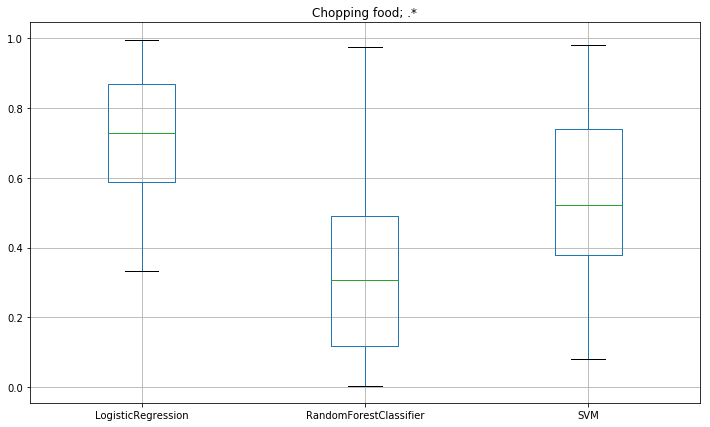

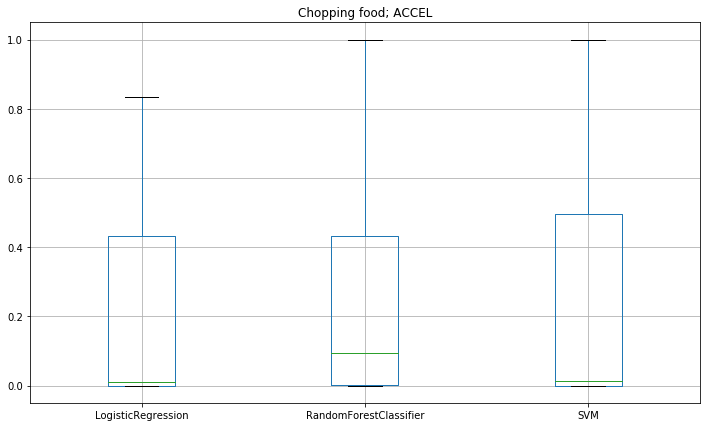

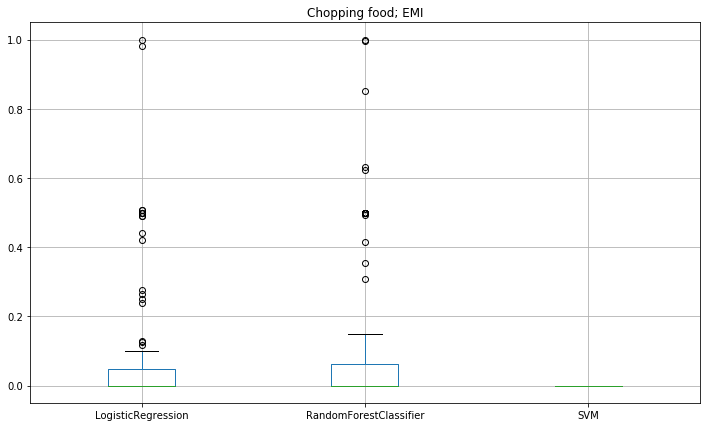

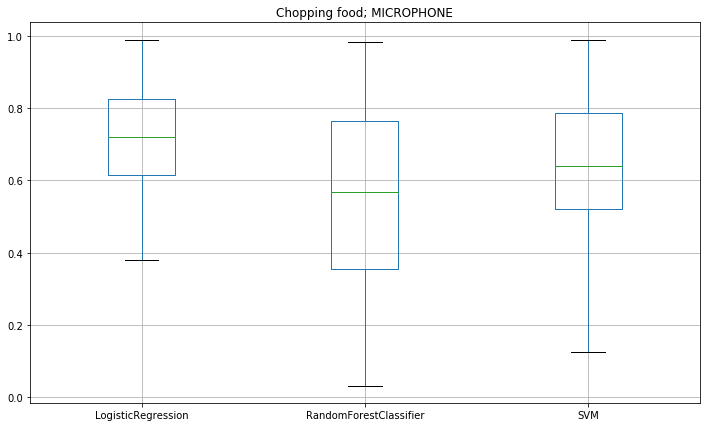

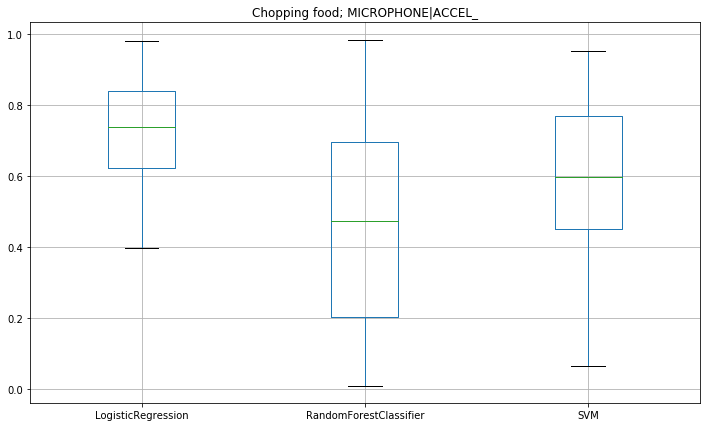

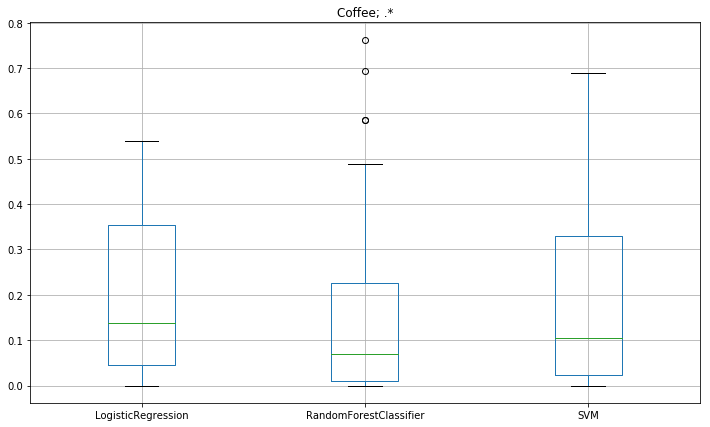

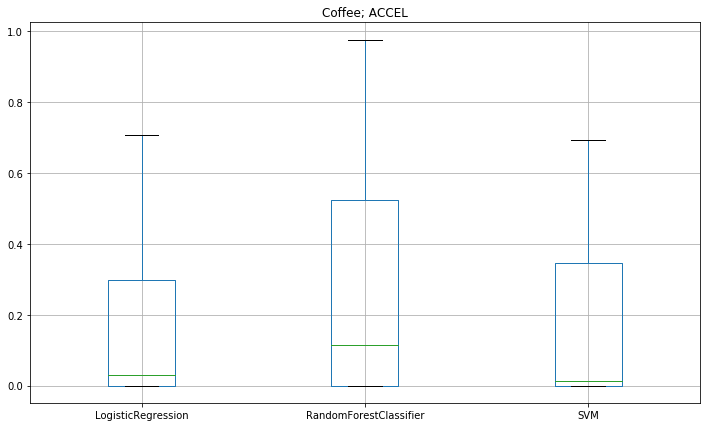

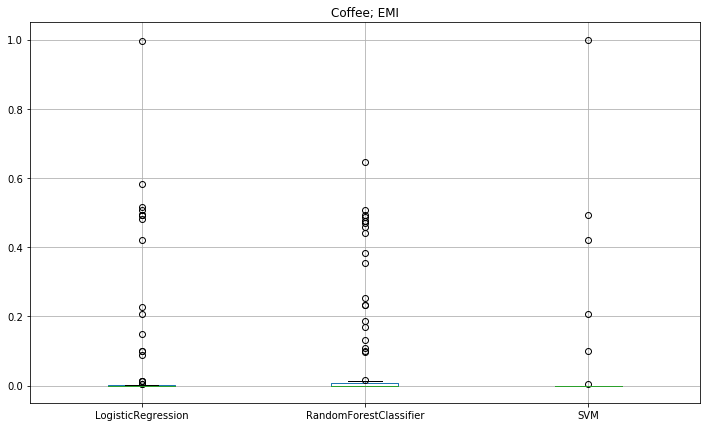

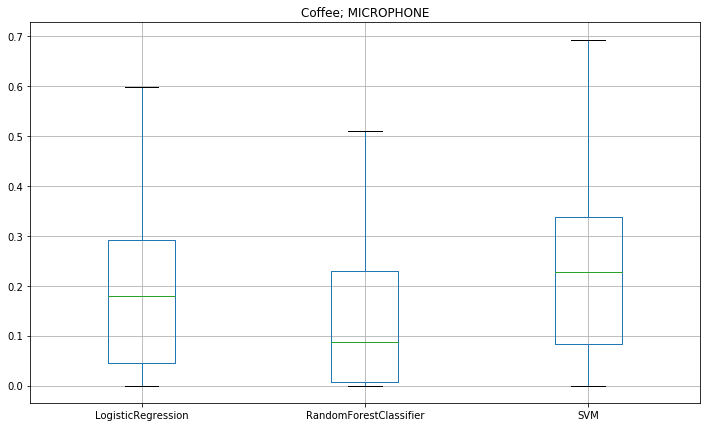

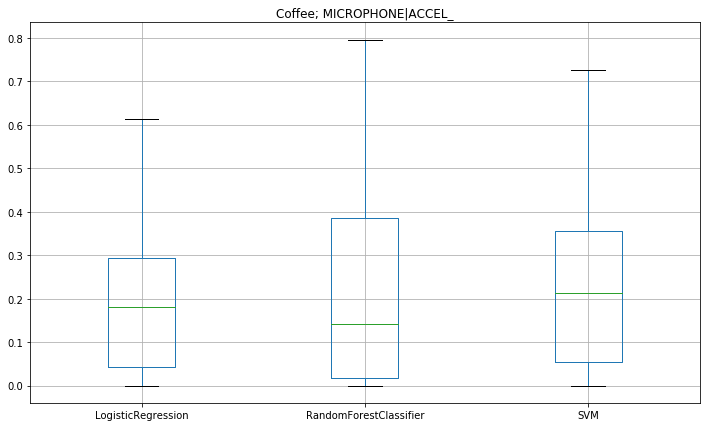

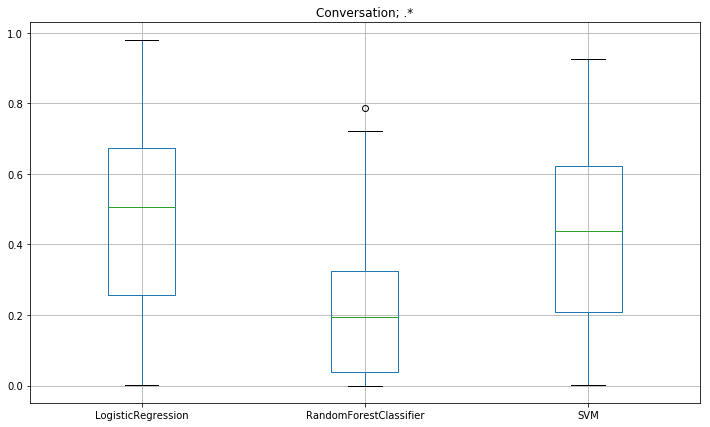

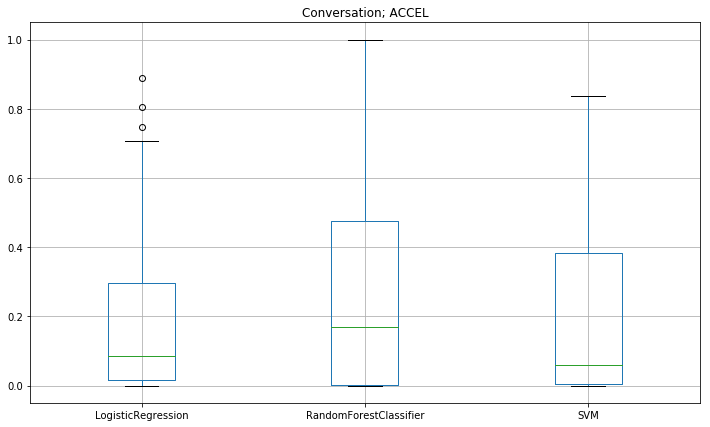

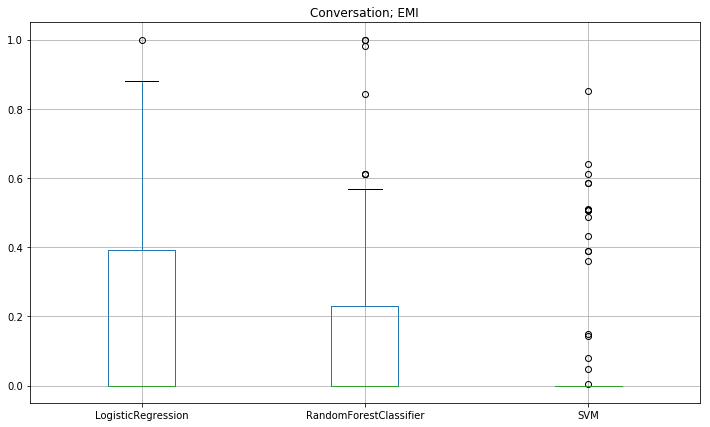

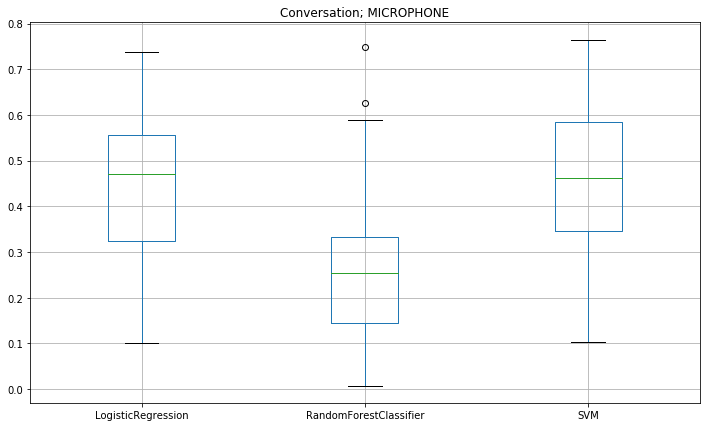

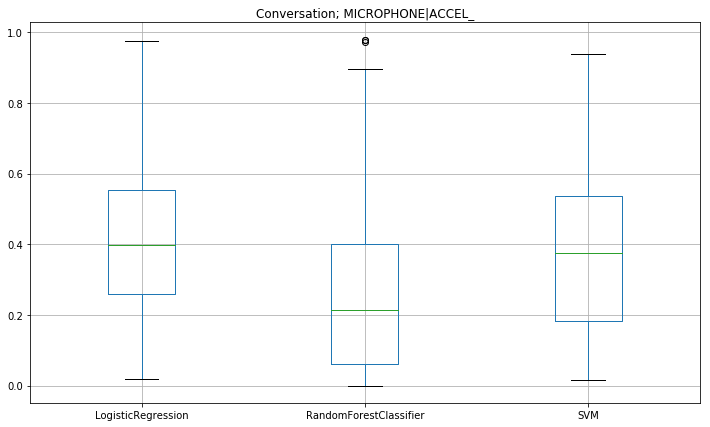

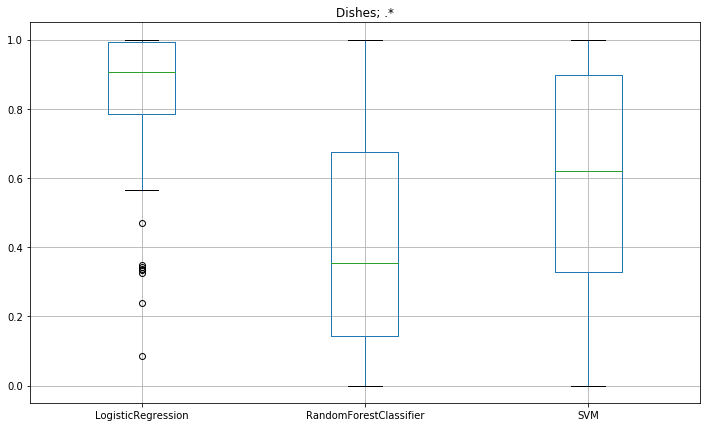

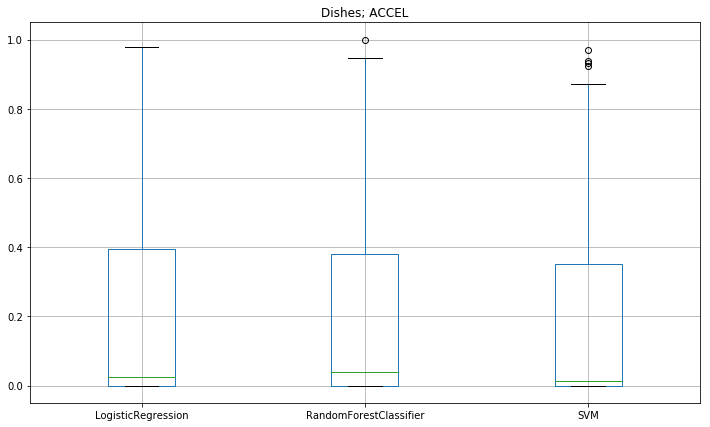

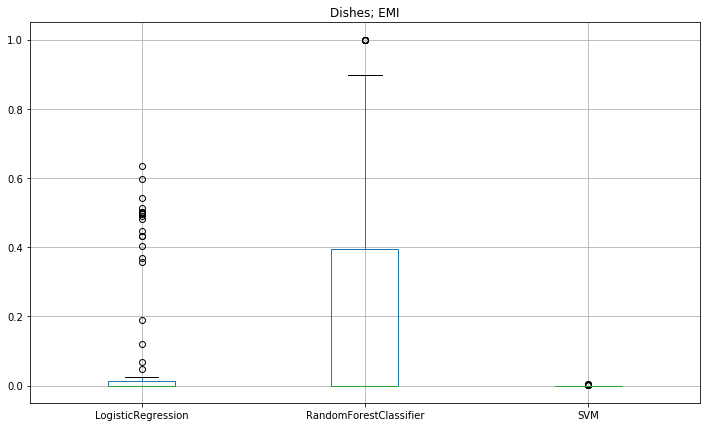

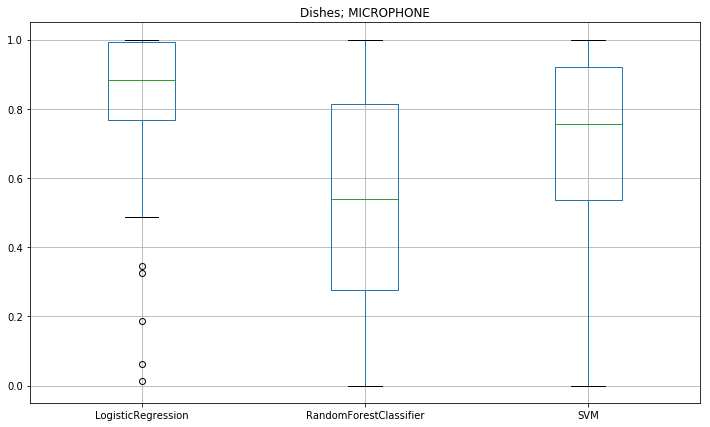

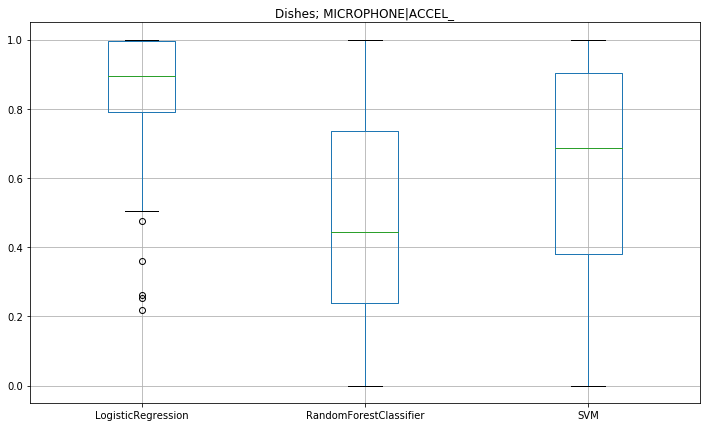

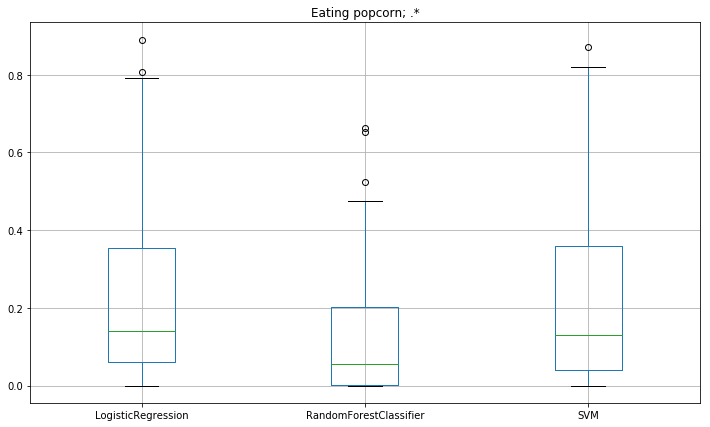

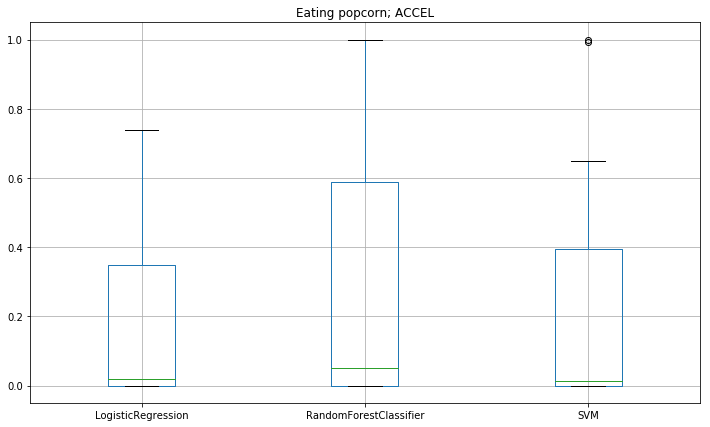

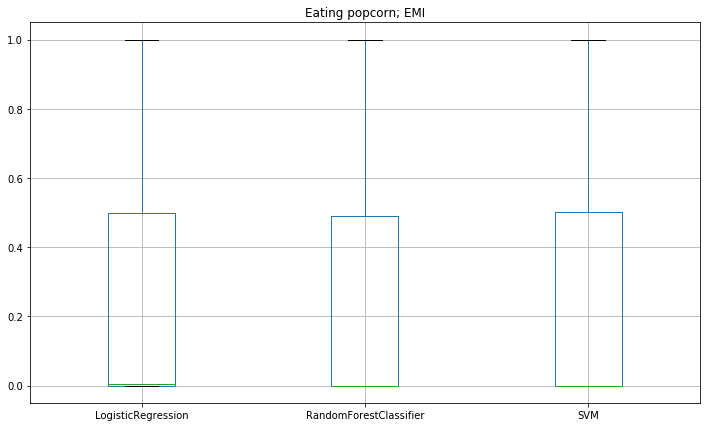

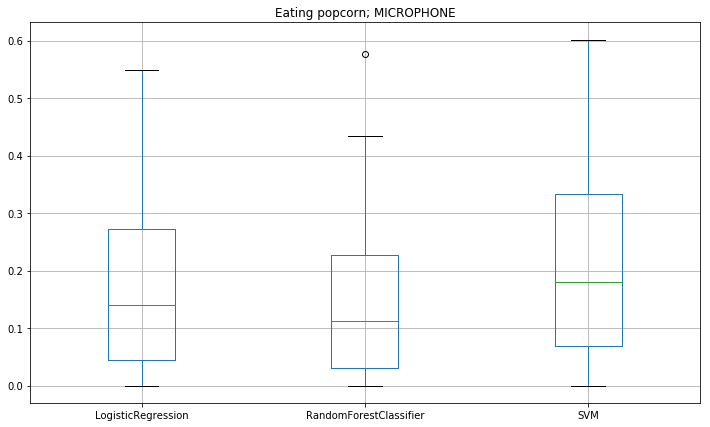

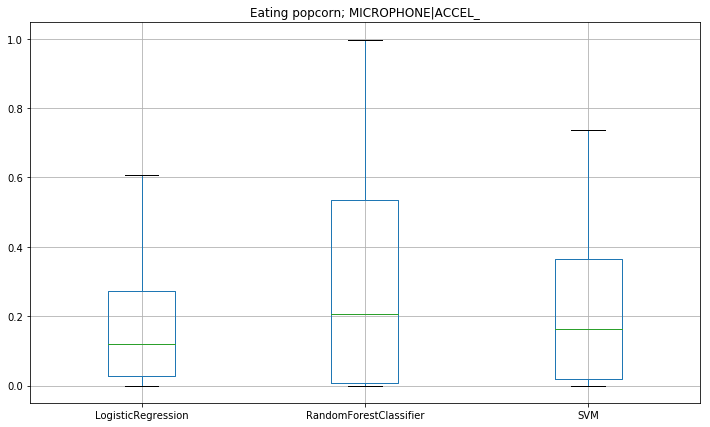

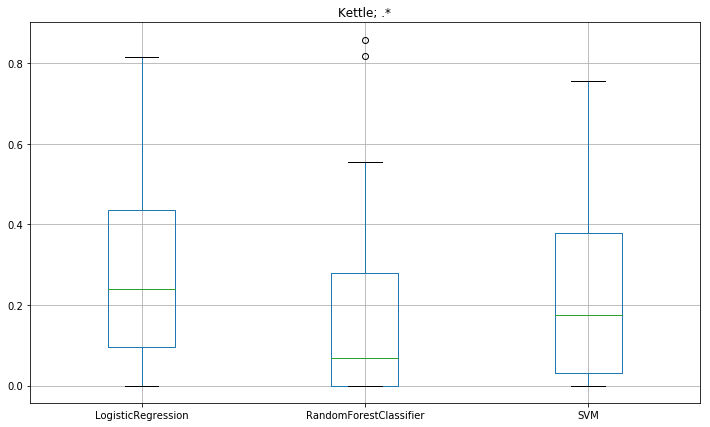

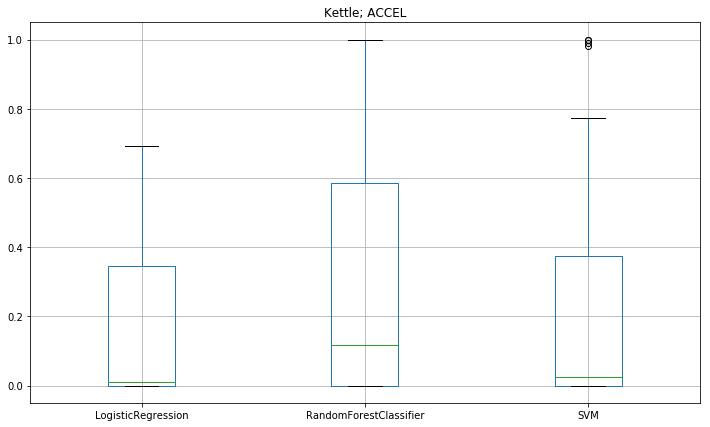

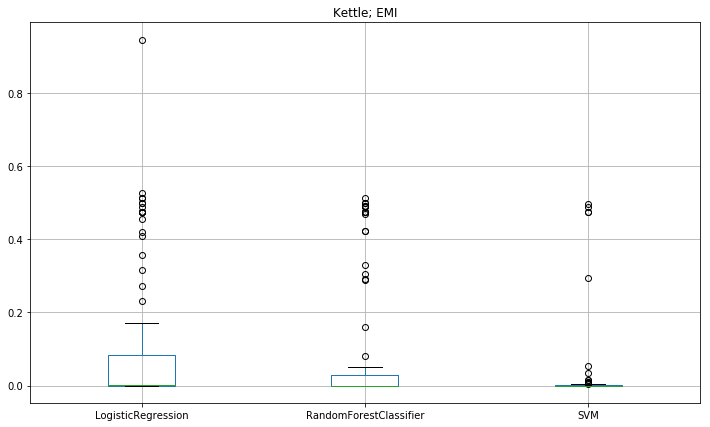

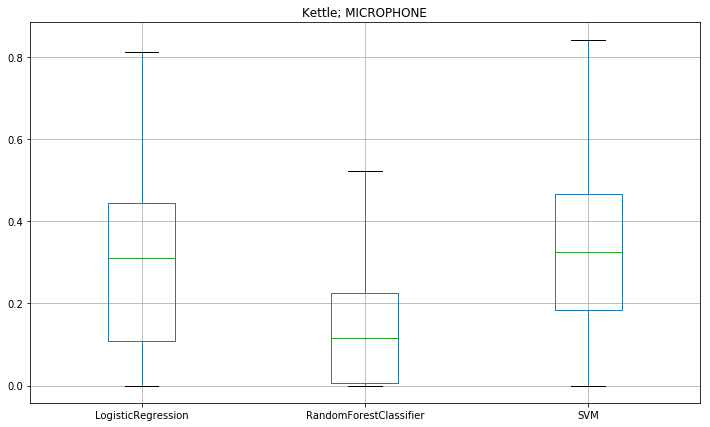

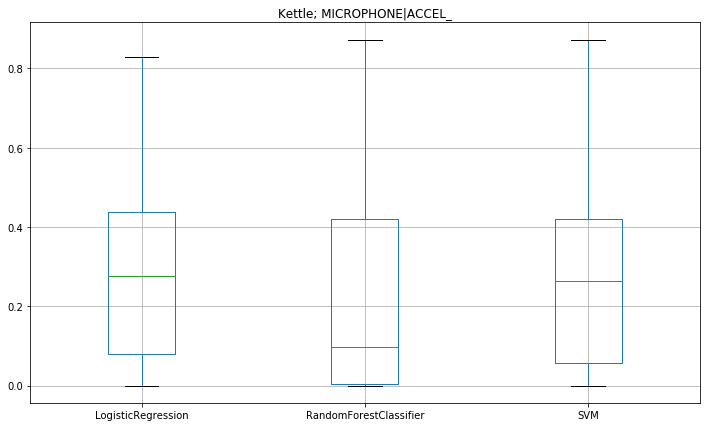

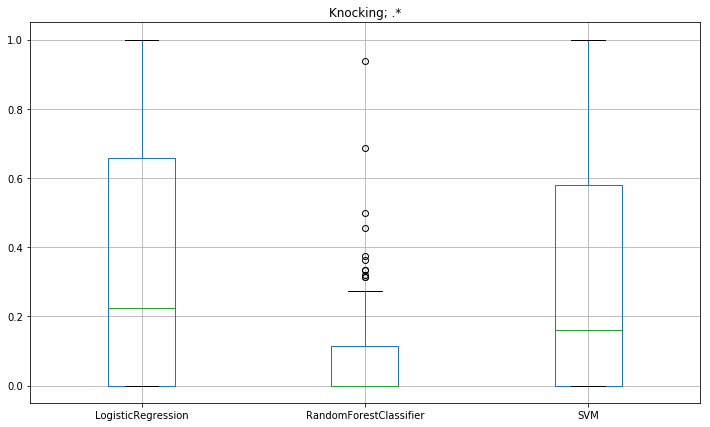

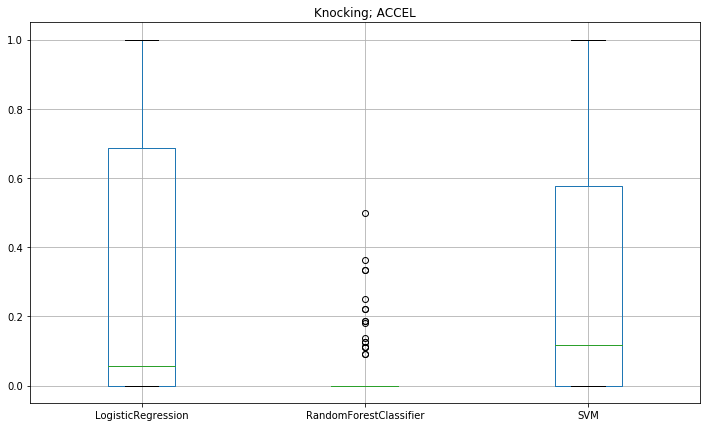

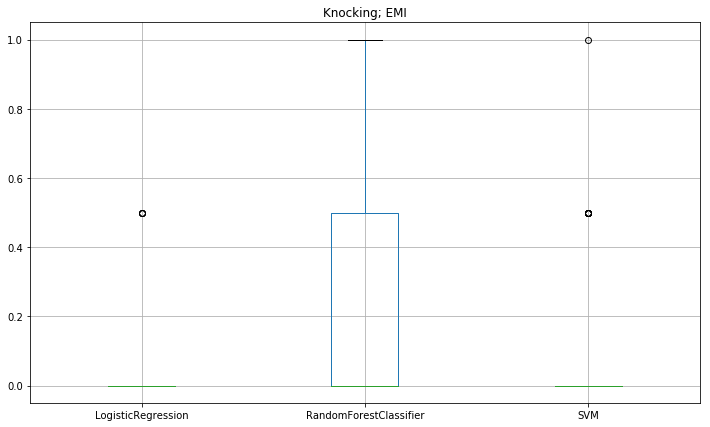

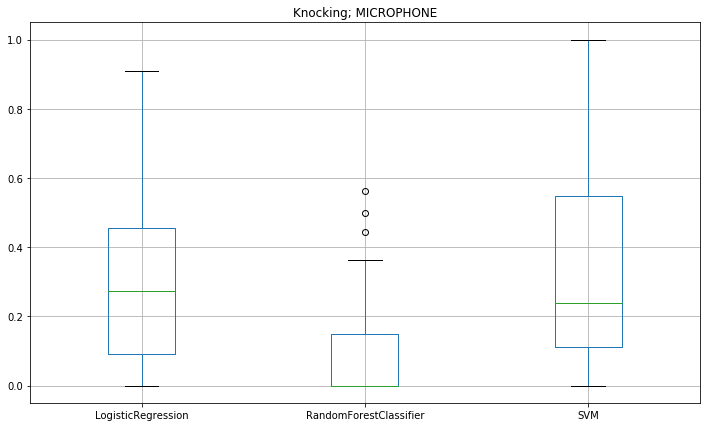

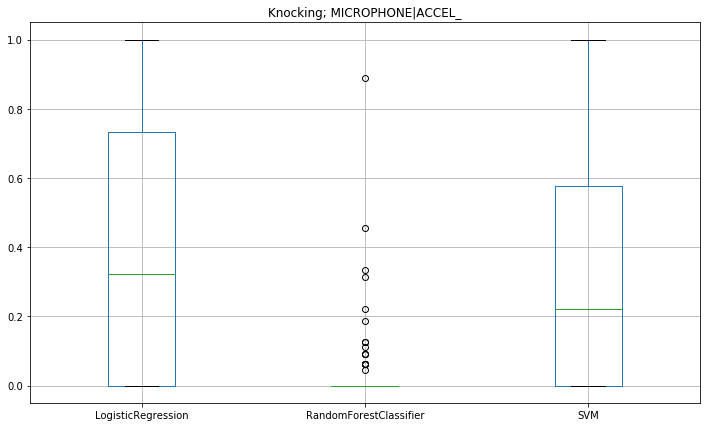

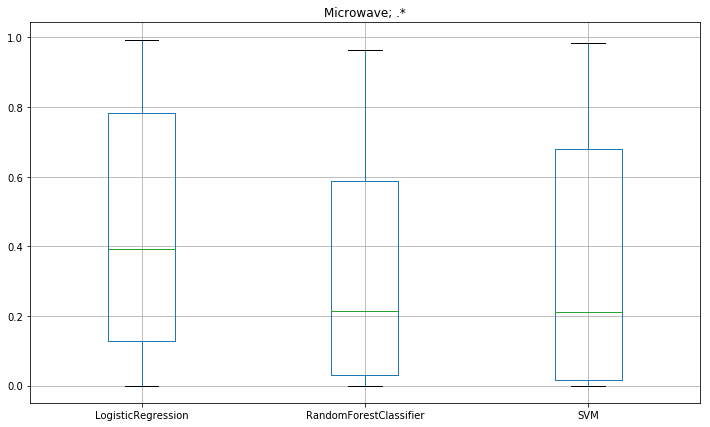

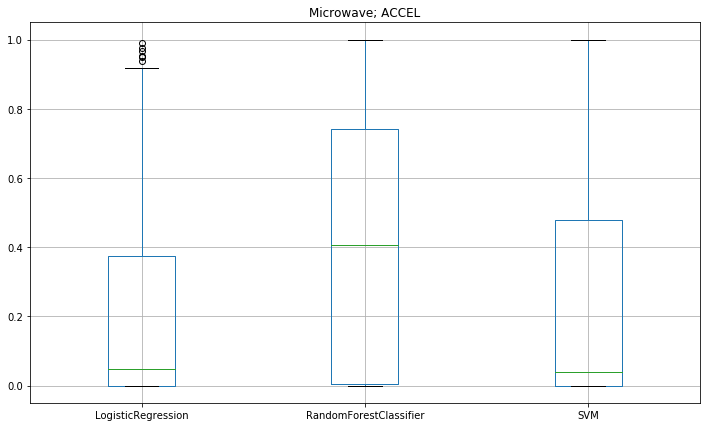

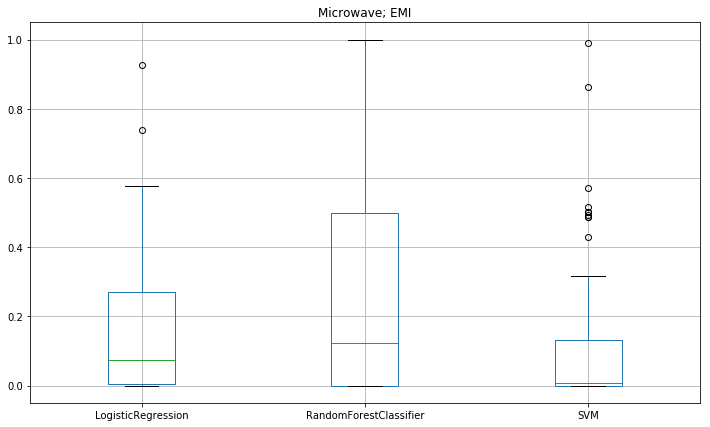

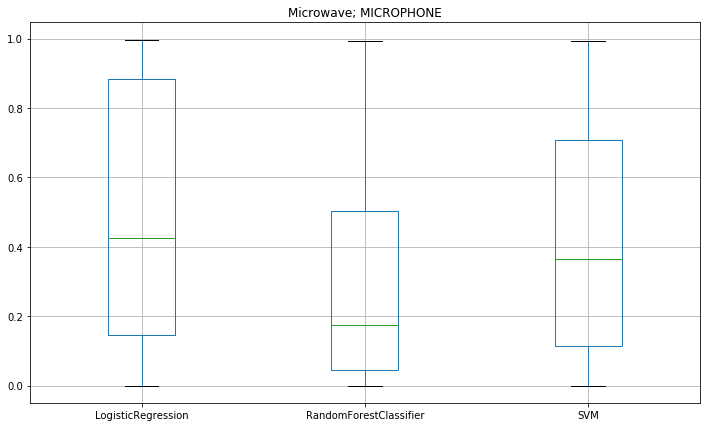

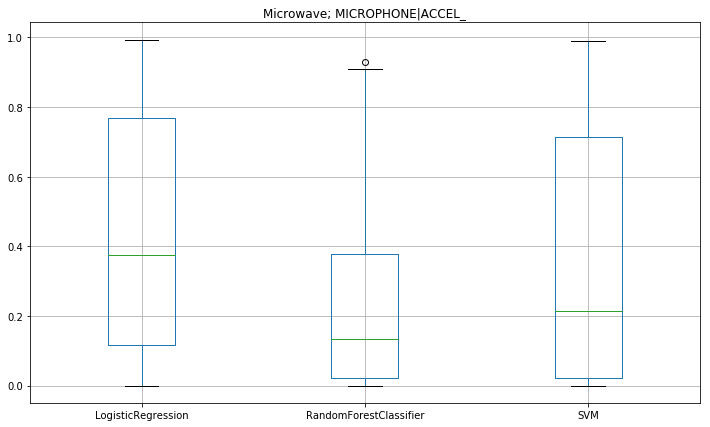

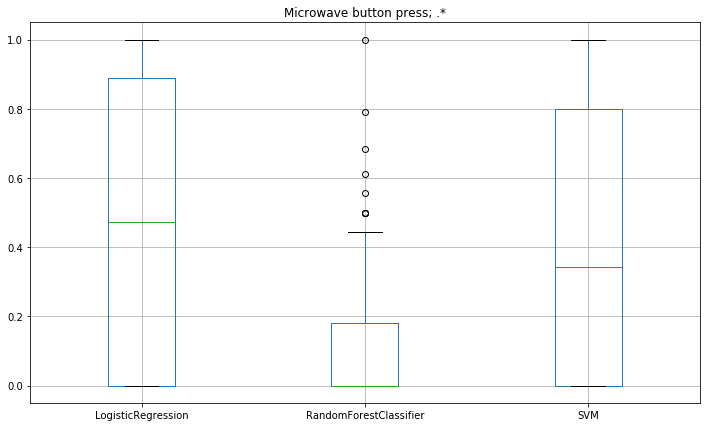

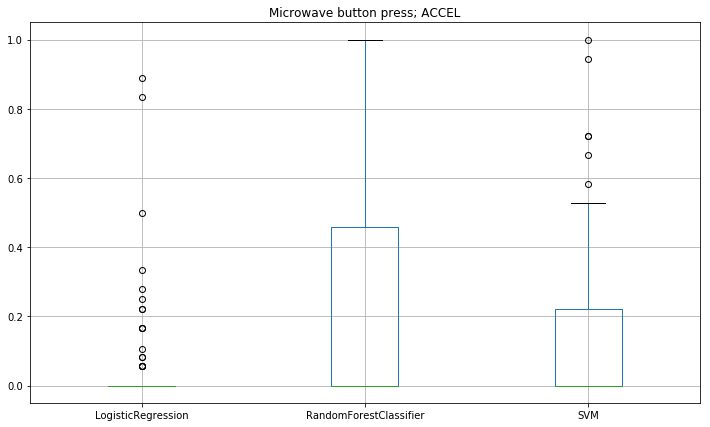

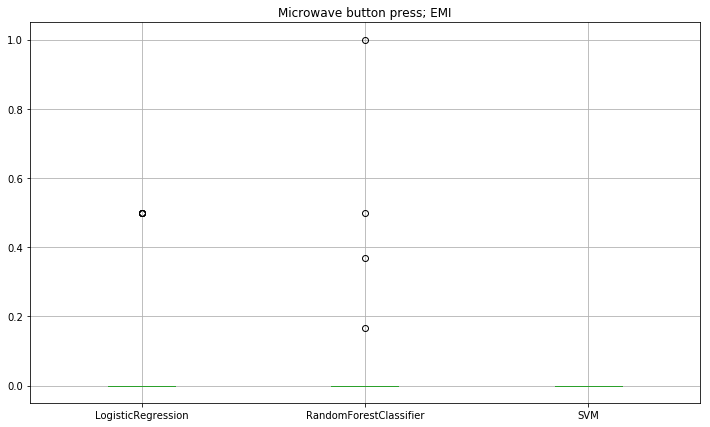

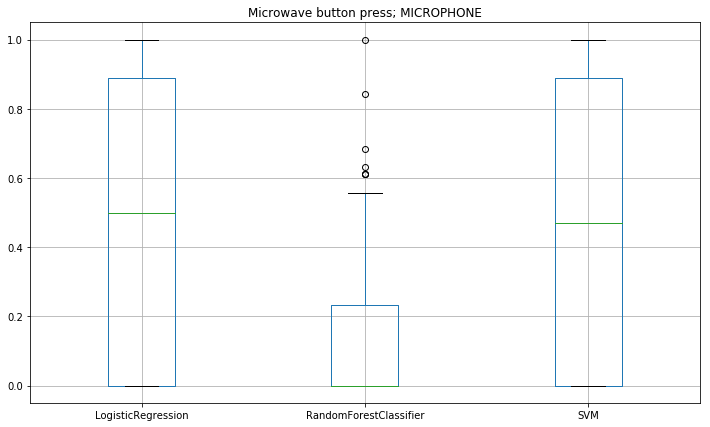

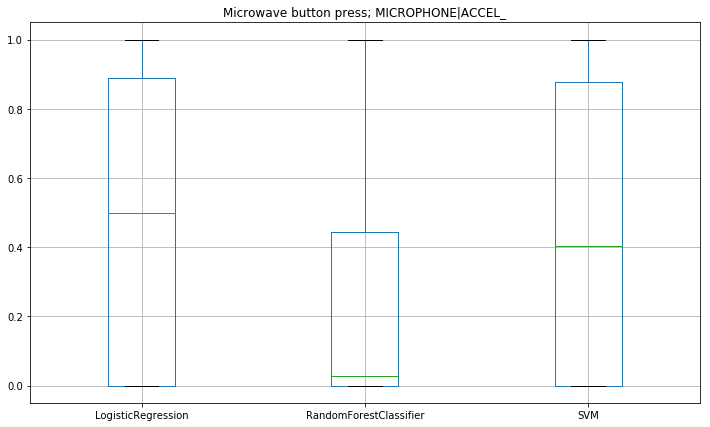

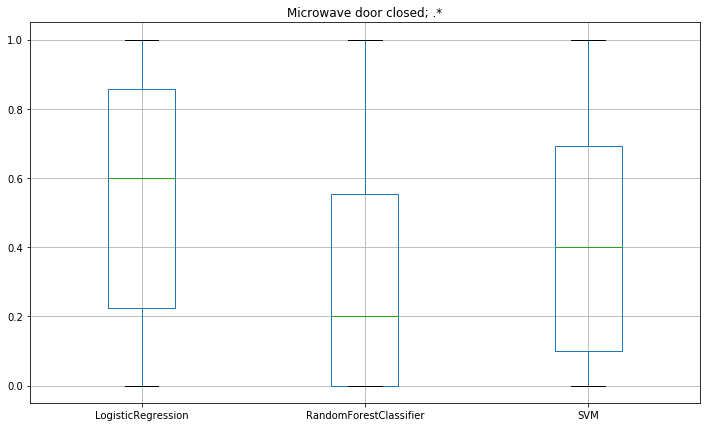

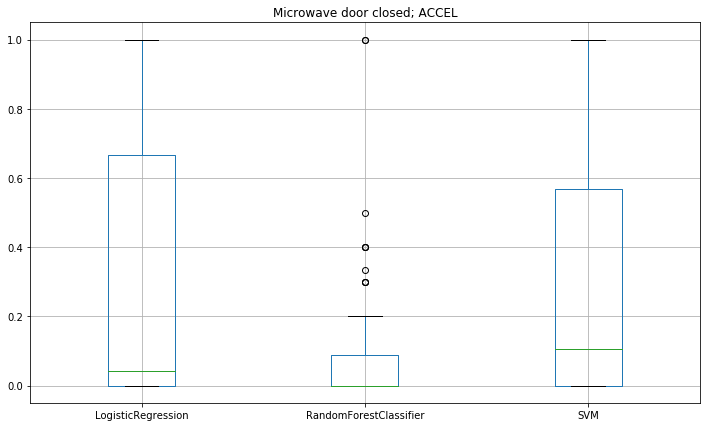

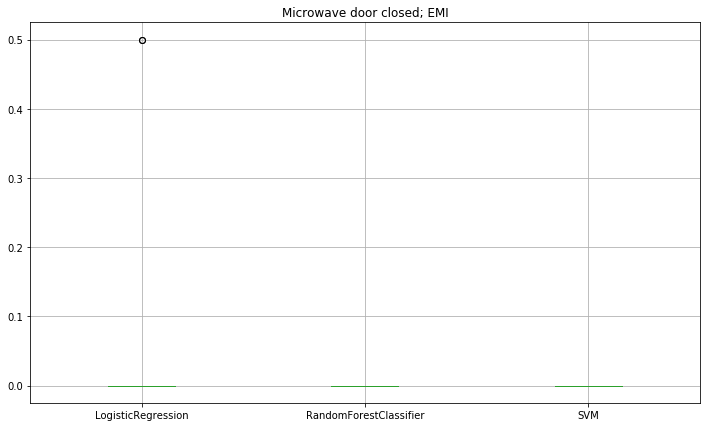

ValueError: arrays must all be same length

In [49]:
labels = np.unique([r.label_name() for r in results])
features = np.unique([r.features for r in results])
classifiers = np.unique([r.classifier for r in results])
statistics = [TestResultStatistics(r) for r in result_set]
types_of_transfer = np.unique([s.type_of_transfer() for s in statistics])

for label in labels:
    for feature in features:
        df_values = {}
        for classifier in classifiers:
            result_set = [r for r in results if r.label_name() == label and r.features == feature and r.classifier == classifier]
            statistics = [TestResultStatistics(r) for r in result_set]
            df_values[classifier] = [s.accuracy_positive() for s in statistics]
        pd.DataFrame(df_values).boxplot()
        plt.title(label + '; ' + feature)
        plt.show()